in relation to the Gujarati book (basic econometrics), answer question 22.25 pp 800: Table 22.7 gives data on three-month (TB3M) and six-month (TB6M) Treasury bill
rates from January 1, 1982, to March 2008, for a total of 315 monthly observations.
The data can be found on the textbook's website.
to. Plot the two time series in the same diagram. What do you see?
b. Do a formal unit root analysis to find out if these time series are stationary.
c. Are the two time series cointegrated? How do you know? Show the necessary
calculations.
d. What is the economic meaning of cointegration in the present context? If the two
series are not cointegrated, what are the economic implications?
and. If you want to estimate a VAR model, say, with four lags of each variable, do you
have to use the first differences of the two series or can you do the analysis in
levels of the two series? Justify your answer.

In [3]:

# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

rates3=pd.read_excel("./rates.xlsx")["GS3M"]
rates6=pd.read_excel("./rates.xlsx")["GS6M"]


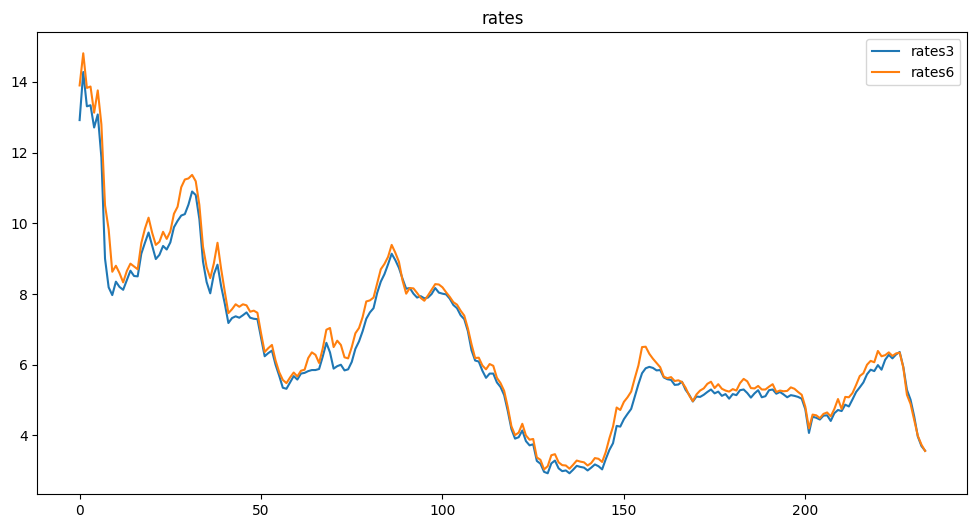

In [4]:
# Plot the series
plt.figure(figsize=(12,6))
plt.plot(rates3, label='rates3')
plt.plot(rates6, label='rates6')
plt.title('rates')
plt.legend()
plt.show()

In [8]:
#Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(rates3, "rates3")
unit_root_tests(rates3, "rates6")


Unit Root Tests for rates3:
ADF Test:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values: {'1%': np.float64(-3.460018927623594), '5%': np.float64(-2.8745897386146817), '10%': np.float64(-2.57372514086348)}

KPSS Test:
KPSS Statistic: 1.4540
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for rates6:
ADF Test:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values: {'1%': np.float64(-3.460018927623594), '5%': np.float64(-2.8745897386146817), '10%': np.float64(-2.57372514086348)}

KPSS Test:
KPSS Statistic: 1.4540
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [10]:
# Cointegration test
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: rates3 and rates6 are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between rates3 and rates6")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'rates3': rates3,
    'rates6': rates6
}).dropna()

# Run cointegration test
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [52.36462346 15.02232689]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: Cointegration exists at 95% confidence level
    Trace statistic (52.36) > 95% critical value (15.49)
  - r = 1: Cointegration exists at 95% confidence level
    Trace statistic (15.02) > 95% critical value (3.84)
Conclusion: rates3 and rates6 are cointegrated - they share a long-run equilibrium relationship


What is the economic meaning of cointegration in the present context? If the two
series are not cointegrated, what are the economic implications?

Cointegration between the 3-month and 6-month interest rates indicates that, despite being individually non-stationary, the two rates share a stable long-run equilibrium relationship. Short-term deviations are temporary and tend to correct over time, reflecting an integrated term structure where market expectations and monetary policy link short- and medium-term rates.

If the series were not cointegrated, it would imply no long-run equilibrium, allowing the rates to diverge permanently. In that scenario, shocks to one maturity would not necessarily transmit to the other, suggesting a lack of integration in interest-rate markets.

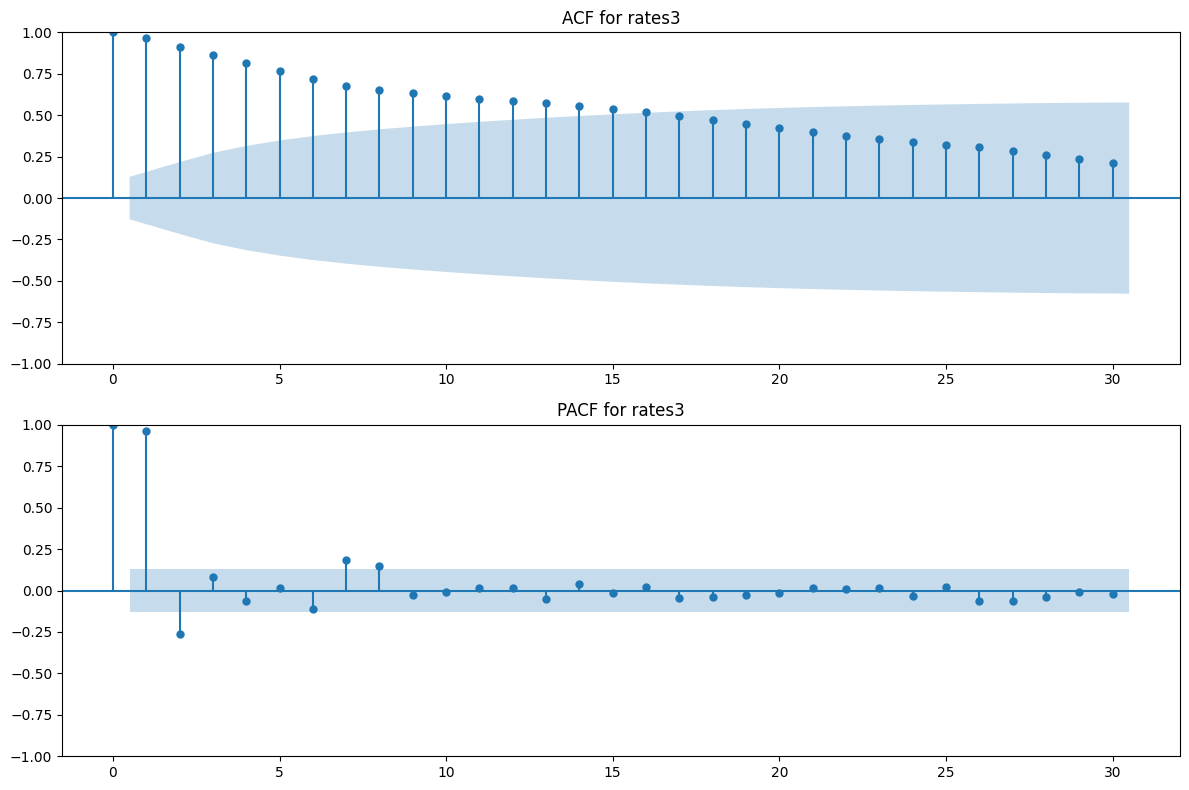


Correlogram Interpretation for rates3:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


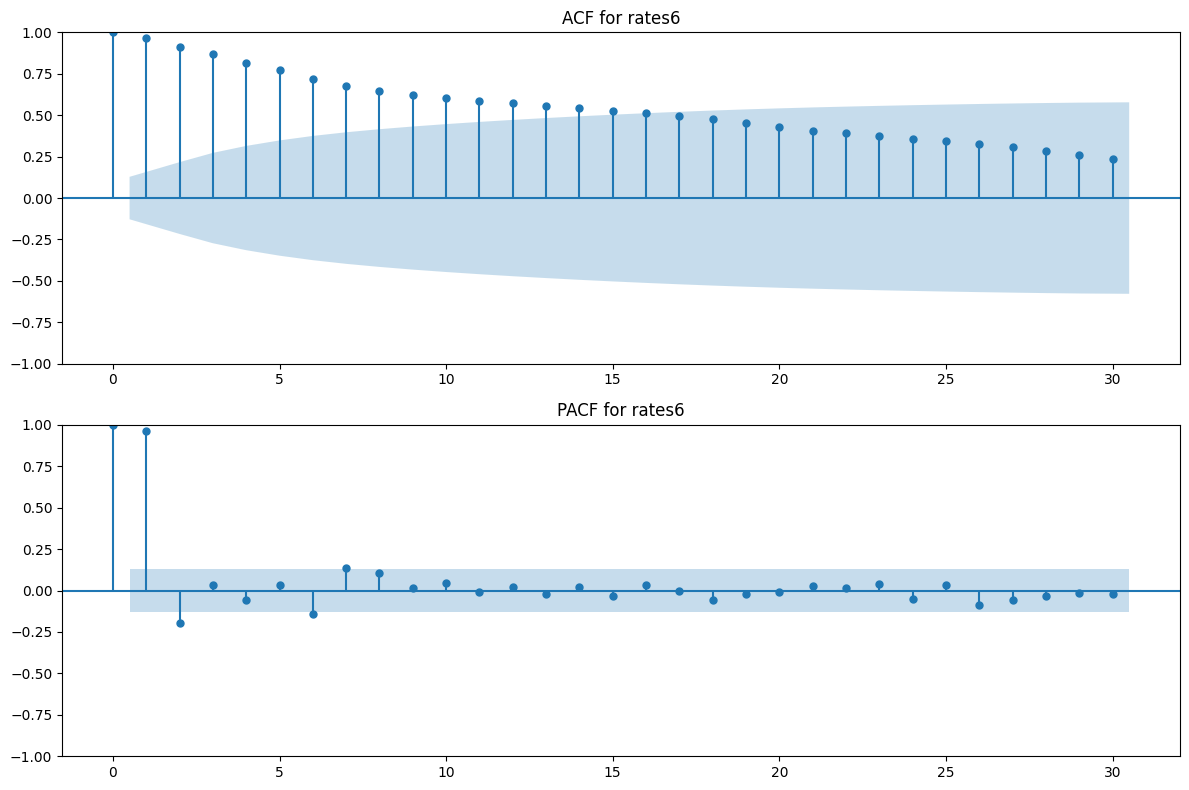


Correlogram Interpretation for rates6:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot correlograms with interpretation
def plot_correlograms(series, name, lags=30):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms for original series
plot_correlograms(rates3, "rates3")
plot_correlograms(rates6, "rates6")


If you want to estimate a VAR model, say, with four lags of each variable, do you have to use the first differences of the two series or can you do the analysis in levels of the two series? Justify your answer.

Para estimar un modelo VAR, en principio las series deben ser estacionarias, por lo que normalmente se aplicarían primeras diferencias si las series en niveles son no estacionarias. En los correlogramas se observa que, incluso con cuatro rezagos, persiste autocorrelación en la ACF, lo que sugiere que las series no son estacionarias en niveles. Por tanto, diferenciar las series sería una opción apropiada.

Sin embargo, dado que ambas series parecen estar cointegradas, también sería adecuado utilizar un modelo VECM. Este tipo de modelo permite trabajar con series no estacionarias que están integradas en el mismo orden y que además presentan una relación de cointegración. En ese caso, se conserva la información de largo plazo y se obtiene una especificación consistente tanto para la dinámica de corto plazo como para el equilibrio de largo plazo.

